# 4.3 アルゴリズム選択

In [2]:
# 日本語化ライブラリ導入
!pip install japanize-matplotlib | tail -n 1

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
# 共通事前処理

# 余分なワーニングを非表示にする
import warnings
warnings.filterwarnings('ignore')

# 必要ライブラリのimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# matplotlib日本語化対応
import japanize_matplotlib

# データフレーム表示用関数
from IPython.display import display

# 表示オプション調整
# numpyの浮動小数点の表示精度
np.set_printoptions(suppress=True, precision=4)
# pandasでの浮動小数点の表示精度
pd.options.display.float_format = '{:.4f}'.format
# データフレームですべての項目を表示
pd.set_option("display.max_columns",None)
# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14
# 乱数の種
random_seed = 123

### 4.3.2 サンプルコーディングで用いるデータ

In [4]:
# サンプルデータの生成

# ライブラリインポート
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import make_classification

# 線形分離型
X1, y1 = make_classification(n_features=2, n_redundant=0, 
    n_informative=2, random_state=random_seed, 
    n_clusters_per_class=1, n_samples=200, n_classes=2)

# 三日月型 (線形分離不可)
X2, y2 = make_moons(noise = 0.05, random_state=random_seed, 
    n_samples=200)

# 円形 (線形分離不可)
X3, y3 = make_circles(noise = 0.02, random_state=random_seed, 
    n_samples=200)

# 3種類のデータをDataListに保存
DataList = [(X1, y1), (X2, y2), (X3, y3)]

# N: データの種類数
N = len(DataList)

In [5]:
X1.shape

(200, 2)

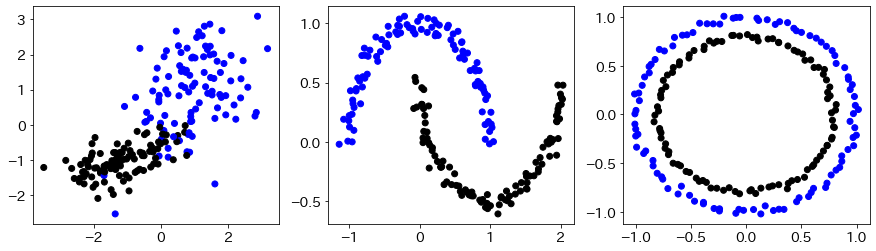

In [6]:
# 散布図表示
plt.figure(figsize=(15,4))

# カラーマップ定義
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#0000FF', '#000000'])

for i, data in enumerate(DataList):
    X, y = data
    ax = plt.subplot(1, N, i+1)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap)
    
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

# 決定境界の表示関数
def plot_boundary(ax, x, y, algorithm):
    x_train, x_test, y_train, y_test = train_test_split(x, y,
            test_size=0.5, random_state=random_seed)
    # カラーマップ定義
    from matplotlib.colors import ListedColormap
    cmap1 = plt.cm.bwr
    cmap2 = ListedColormap(['#0000FF', '#000000'])

    h = 0.005
    algorithm.fit(x_train, y_train)
    score_test = algorithm.score(x_test, y_test)
    score_train = algorithm.score(x_train, y_train)
    f1_min = x[:, 0].min() - 0.5
    f1_max = x[:, 0].max() + 0.5
    f2_min = x[:, 1].min() - 0.5
    f2_max = x[:, 1].max() + 0.5
    f1, f2 = np.meshgrid(np.arange(f1_min, f1_max, h), 
                         np.arange(f2_min, f2_max, h))
    if hasattr(algorithm, "decision_function"):
        Z = algorithm.decision_function(np.c_[f1.ravel(), f2.ravel()])
        Z = Z.reshape(f1.shape)
        ax.contour(f1, f2, Z, levels=[0], linewidth=2)
    else:
        Z = algorithm.predict_proba(np.c_[f1.ravel(), f2.ravel()])[:, 1]
        Z = Z.reshape(f1.shape)
    ax.contourf(f1, f2, Z, cmap=cmap1, alpha=0.3)
    ax.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=cmap2)
    ax.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=cmap2, marker='x')
    text = f'検証:{score_test:.2f}  訓練: {score_train:.2f}'
    ax.text(f1.max() - 0.3, f2.min() + 0.3, text, horizontalalignment='right',
    fontsize=18) 
    

In [8]:
# 散布図と決定境界の表示関数

def plot_boundaries(algorithm, DataList):
    plt.figure(figsize=(15,4))
    for i, data in enumerate(DataList):
        X, y = data
        ax = plt.subplot(1, N, i+1)
        plot_boundary(ax, X, y, algorithm)
    plt.show()

### 4.3.3 ロジスティック回帰

#### シグモイド関数のグラフ表示

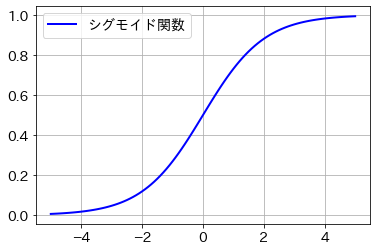

In [9]:
# シグモイド関数の定義
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# xのデータ準備
x = np.linspace(-5, 5, 101)

# yのデータ準備
y = sigmoid(x)

# グラフ表示
plt.plot(x, y, label='シグモイド関数', c='b', lw=2)

# 凡例表示
plt.legend()

# 方眼表示
plt.grid()

# グラフ描画
plt.show()

LogisticRegression(random_state=123)


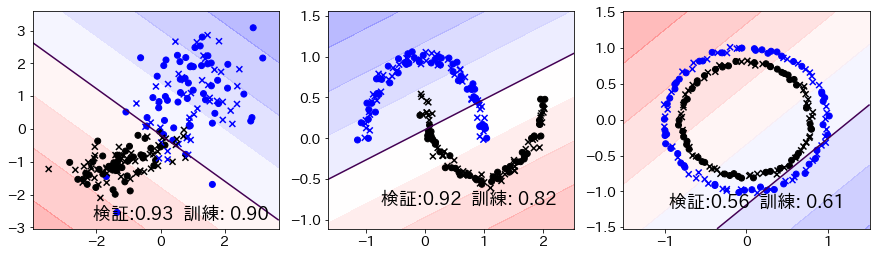

In [10]:
# ロジスティック回帰の散布図・分類結果表示

# アルゴリズムの選定
from sklearn.linear_model import LogisticRegression
algorithm = LogisticRegression(random_state=random_seed)

# アルゴリズムの持つパラメータの表示 
print(algorithm)

# 表示関数の呼び出し
plot_boundaries(algorithm, DataList)

### 4.3.4 サポートベクターマシン(カーネル)

SVC(random_state=123)


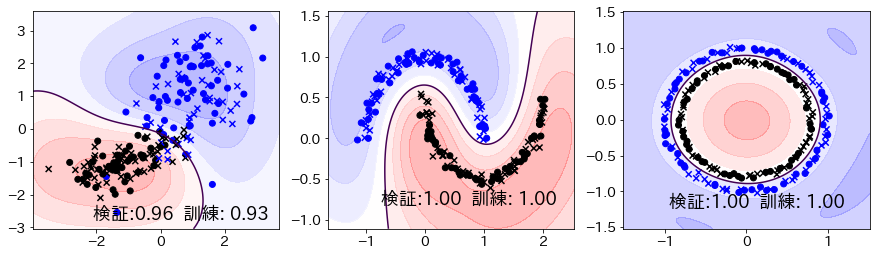

In [11]:
# SVM (カーネル)の散布図・分類結果表示

# アルゴリズムの選定
from sklearn.svm import SVC
algorithm = SVC(kernel='rbf', random_state=random_seed)

# アルゴリズムの持つパラメータの表示 
print(algorithm)

# 表示関数の呼び出し
plot_boundaries(algorithm, DataList)

### 4.3.5 ニューラルネットワーク

MLPClassifier(random_state=123)


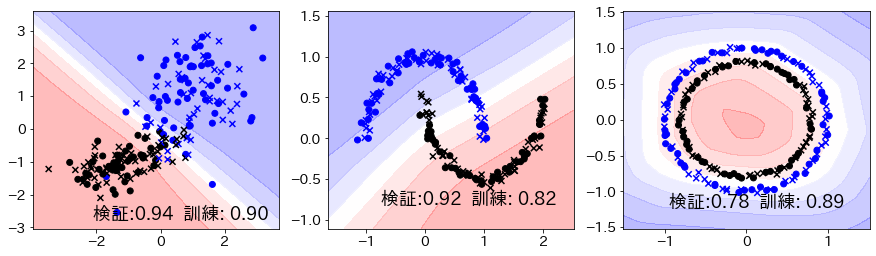

In [13]:
# ニューラルネットワークの散布図・分類結果表示

# アルゴリズムの選定
from sklearn.neural_network import MLPClassifier
algorithm = MLPClassifier(random_state=random_seed)

# アルゴリズムの持つパラメータの表示 
print(algorithm)

# 表示関数の呼び出し
plot_boundaries(algorithm, DataList)

MLPClassifier(hidden_layer_sizes=(100, 100), random_state=123)


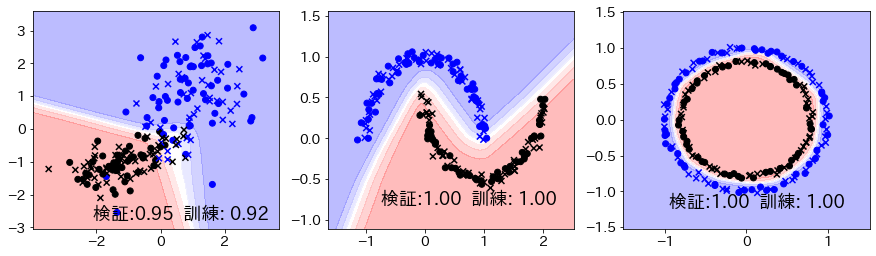

In [14]:
# ニューラルネットワークの散布図・分類結果表示

# アルゴリズムの選定
# 隠れ層ノード数=(100,100)
from sklearn.neural_network import MLPClassifier
algorithm = MLPClassifier(hidden_layer_sizes=(100,100), random_state=random_seed)

# アルゴリズムの持つパラメータの表示 
print(algorithm)

# 表示関数の呼び出し
plot_boundaries(algorithm, DataList)

### 4.3.6 決定木

In [15]:
# 追加ライブラリのimport
import seaborn as sns

# サンプルデータの読み込み
df_iris = sns.load_dataset("iris")

# 2種類の花に絞り込み
df2 = df_iris[50:150]

# データ分離
X = df2.drop('species', axis=1)
y = df2['species']

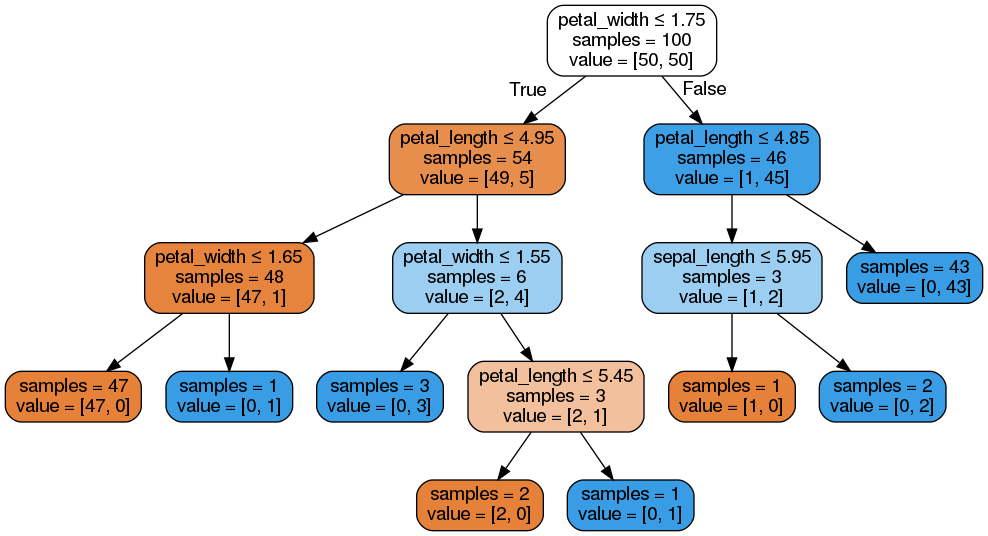

In [20]:
# 学習
from sklearn.tree import DecisionTreeClassifier
algorithm = DecisionTreeClassifier(random_state=random_seed)
algorithm.fit(X, y)

# 決定木のツリー表示
from sklearn import tree
with open('iris-dtree.dot', mode='w') as f:
    tree.export_graphviz( algorithm, out_file=f,
        feature_names=X.columns, filled=True, rounded=True,  
        special_characters=True, impurity=False, proportion=False
    ) 
import pydotplus
from IPython.display import Image
graph = pydotplus.graphviz.graph_from_dot_file('iris-dtree.dot')
graph.write_png('iris-dtree.png')
Image(graph.create_png())

DecisionTreeClassifier(random_state=123)


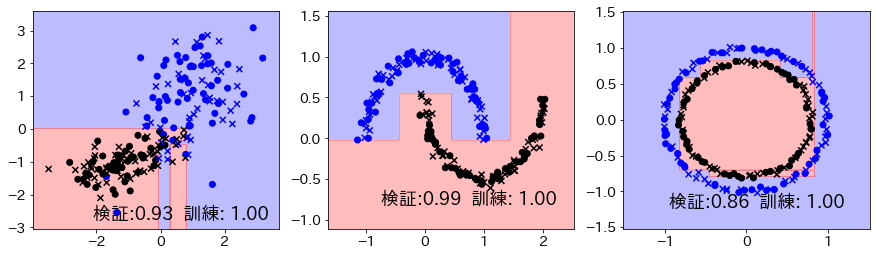

In [21]:
# 決定木の散布図・分類結果表示

# アルゴリズムの選定
from sklearn.tree import DecisionTreeClassifier
algorithm = DecisionTreeClassifier(random_state=random_seed)

# アルゴリズムの持つパラメータの表示 
print(algorithm)

# 表示関数の呼び出し
plot_boundaries(algorithm, DataList)

DecisionTreeClassifier(max_depth=3, random_state=123)


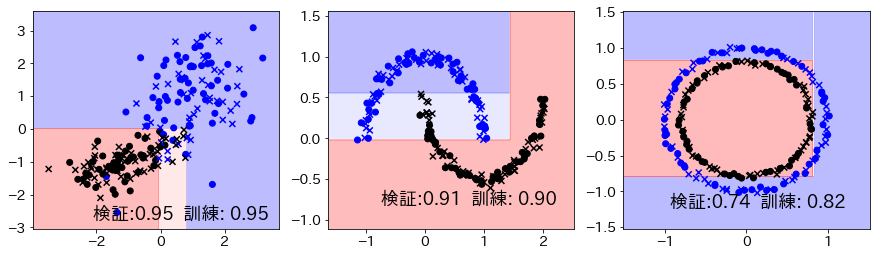

In [22]:
# 決定木の散布図・分類結果表示(max_depth=3の場合)

# アルゴリズムの選定
from sklearn.tree import DecisionTreeClassifier
algorithm = DecisionTreeClassifier(max_depth=3, 
    random_state=random_seed)

# アルゴリズムの持つパラメータの表示 
print(algorithm)

# 表示関数の呼び出し
plot_boundaries(algorithm, DataList)

### 4.3.7 ランダムフォレスト

RandomForestClassifier(random_state=123)


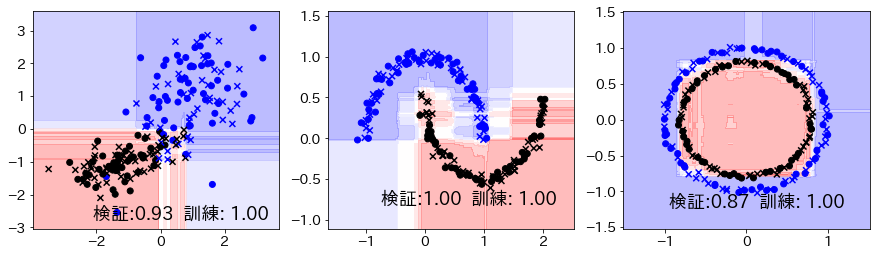

In [23]:
# ランダムフォレストの散布図・分類結果表示

# アルゴリズムの選定
from sklearn.ensemble import RandomForestClassifier
algorithm = RandomForestClassifier(random_state=random_seed)

# アルゴリズムの持つパラメータの表示 
print(algorithm)

# 表示関数の呼び出し
plot_boundaries(algorithm, DataList)

### 4.3.8 XGBoost

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)
[16:35:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:35:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost

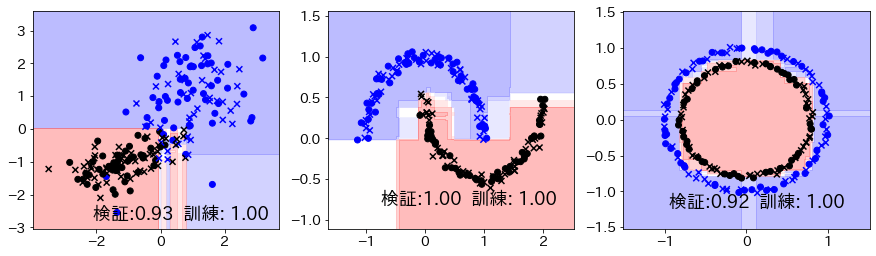

In [26]:
# XGBoostの散布図・分類結果表示

# アルゴリズムの選定
import xgboost
algorithm = xgboost.XGBClassifier(random_state=random_seed)

# アルゴリズムの持つパラメータの表示 
print(algorithm)

# 表示関数の呼び出し
plot_boundaries(algorithm, DataList)

### 参考
バージョン確認用

In [ ]:
import sklearn
print(sklearn.__version__)